### Recognition Model: Multi Attribute Image Classifier Training

In [5]:
import pandas as pd
import numpy as np

# Load the original CSV file
csv_file_path = 'celeba_features_final.csv'
df = pd.read_csv(csv_file_path)

# Load the NPZ file
data = np.load('celeba_embeddings_with_all_labels.npz')

# Extract embeddings and labels from NPZ
embeddings = data['embeddings']
npz_labels = data['labels']

# Function to generate label mappings for each attribute
def generate_label_mappings(df):
    # Generate mappings for each attribute (eye color, hair color, eyebrow color, skin tone)
    eye_color_mapping = {label: idx for idx, label in enumerate(sorted(df['eye_color'].unique()))}
    hair_color_mapping = {label: idx for idx, label in enumerate(sorted(df['hair_color'].unique()))}
    eyebrow_color_mapping = {label: idx for idx, label in enumerate(sorted(df['eyebrow_color'].unique()))}
    skin_tone_mapping = {label: idx for idx, label in enumerate(sorted(df['skin_tone'].unique()))}
    
    return eye_color_mapping, hair_color_mapping, eyebrow_color_mapping, skin_tone_mapping

# Generate the mappings
eye_color_mapping, hair_color_mapping, eyebrow_color_mapping, skin_tone_mapping = generate_label_mappings(df)

# Function to extract the correct label mappings from the CSV file
def get_csv_labels(row):
    eye_color_label = eye_color_mapping.get(row['eye_color'], -1)
    hair_color_label = hair_color_mapping.get(row['hair_color'], -1)
    eyebrow_color_label = eyebrow_color_mapping.get(row['eyebrow_color'], -1)
    skin_tone_label = skin_tone_mapping.get(row['skin_tone'], -1)
    return [eye_color_label, hair_color_label, eyebrow_color_label, skin_tone_label]

# Check if the labels from the NPZ file match the labels in the CSV file for the first few rows
sample_size = 5  # Number of samples to check
print("Comparing Labels from NPZ and CSV:")

for i in range(sample_size):
    csv_labels = get_csv_labels(df.iloc[i])
    npz_labels_sample = npz_labels[i]
    
    if np.array_equal(csv_labels, npz_labels_sample):
        print(f"Sample {i+1}: Labels match")
    else:
        print(f"Sample {i+1}: Labels do not match!")
        print(f"  CSV Labels: {csv_labels}")
        print(f"  NPZ Labels: {npz_labels_sample}")
    print("-" * 50)

# Optional: Print the mappings to verify
print("Eye Color Mapping:", eye_color_mapping)
print("Hair Color Mapping:", hair_color_mapping)
print("Eyebrow Color Mapping:", eyebrow_color_mapping)
print("Skin Tone Mapping:", skin_tone_mapping)


Comparing Labels from NPZ and CSV:
Sample 1: Labels match
--------------------------------------------------
Sample 2: Labels match
--------------------------------------------------
Sample 3: Labels match
--------------------------------------------------
Sample 4: Labels match
--------------------------------------------------
Sample 5: Labels match
--------------------------------------------------
Eye Color Mapping: {'blue': 0, 'brown': 1, 'dark': 2, 'dark brown': 3, 'gray': 4, 'green': 5}
Hair Color Mapping: {'black': 0, 'blonde': 1, 'brown': 2, 'dark': 3, 'dark brown': 4, 'gray': 5, 'light brown': 6, 'red': 7}
Eyebrow Color Mapping: {'black': 0, 'blonde': 1, 'brown': 2, 'dark': 3, 'dark brown': 4, 'gray': 5}
Skin Tone Mapping: {'dark': 0, 'fair': 1, 'light': 2, 'medium': 3}


c:\Users\alexi\anaconda3\envs\audio_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Cross-validated accuracy for eye_color: 0.8787
Saved eye_color classifier to eye_color_classifier.pkl
Classification Report for eye_color:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       100
           1       0.51      0.57      0.54       166
           2       0.58      0.31      0.40        36
           3       0.44      0.42      0.43       118
           4       0.70      0.47      0.56        15
           5       0.25      0.20      0.22         5

    accuracy                           0.55       440
   macro avg       0.53      0.46      0.48       440
weighted avg       0.55      0.55      0.54       440



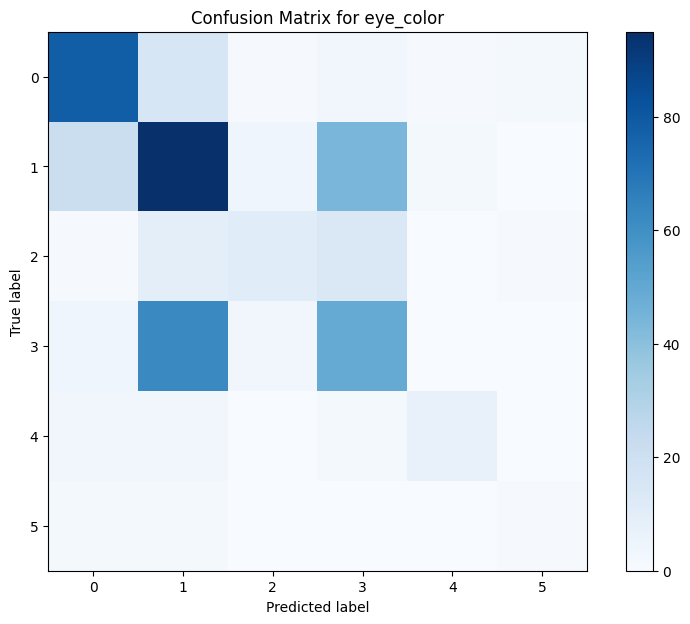

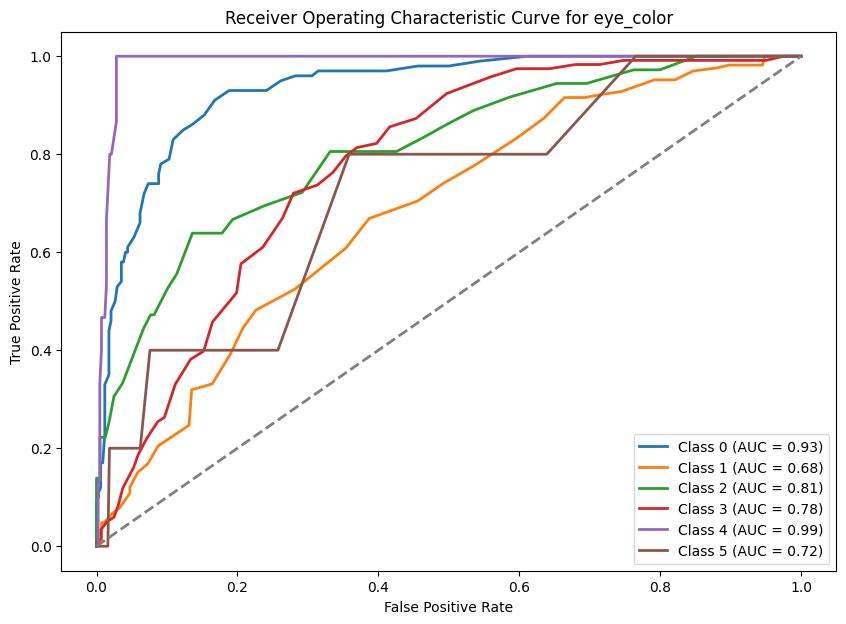

c:\Users\alexi\anaconda3\envs\audio_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Cross-validated accuracy for hair_color: 0.9126
Saved hair_color classifier to hair_color_classifier.pkl
Classification Report for hair_color:
              precision    recall  f1-score   support

           0       0.62      0.74      0.67        92
           1       0.80      0.87      0.83        89
           2       0.44      0.40      0.42        57
           3       0.17      0.06      0.08        18
           4       0.66      0.64      0.65       158
           5       0.84      0.70      0.76        23
           6       0.00      0.00      0.00         1
           7       1.00      0.00      0.00         2

    accuracy                           0.65       440
   macro avg       0.57      0.42      0.43       440
weighted avg       0.64      0.65      0.64       440



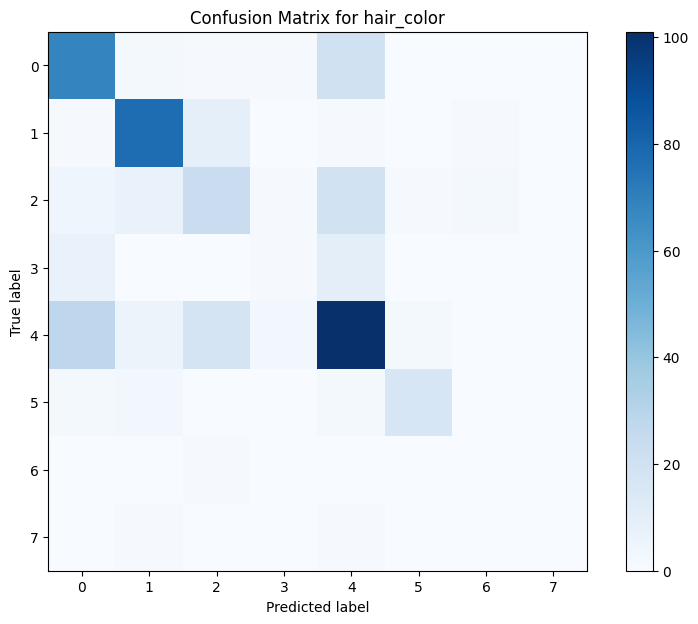

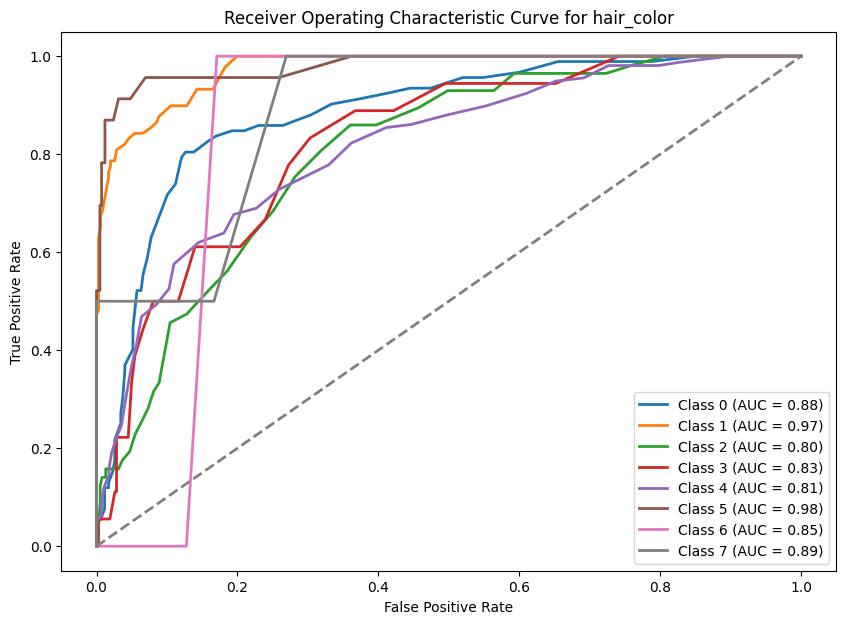

c:\Users\alexi\anaconda3\envs\audio_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Cross-validated accuracy for eyebrow_color: 0.9343
Saved eyebrow_color classifier to eyebrow_color_classifier.pkl
Classification Report for eyebrow_color:
              precision    recall  f1-score   support

           0       0.39      0.62      0.48        29
           1       0.78      0.73      0.75        77
           2       0.51      0.42      0.46        84
           3       0.22      0.11      0.14        19
           4       0.71      0.76      0.73       208
           5       0.85      0.74      0.79        23

    accuracy                           0.65       440
   macro avg       0.58      0.56      0.56       440
weighted avg       0.65      0.65      0.65       440



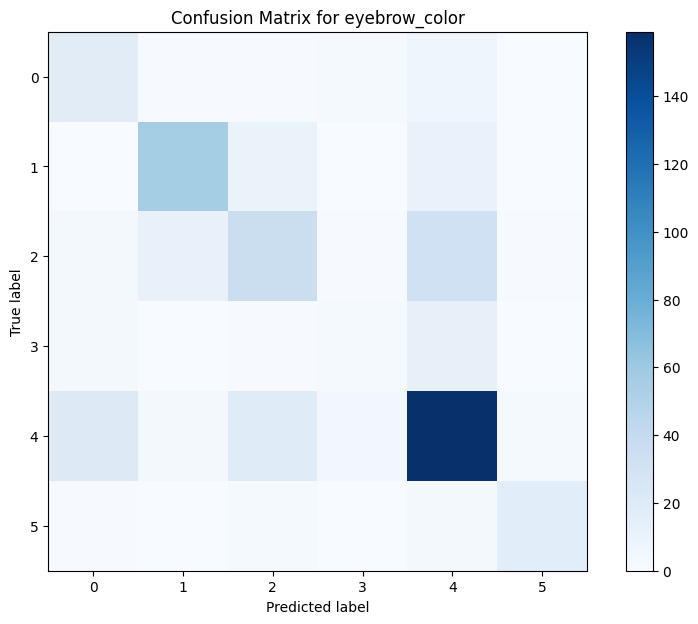

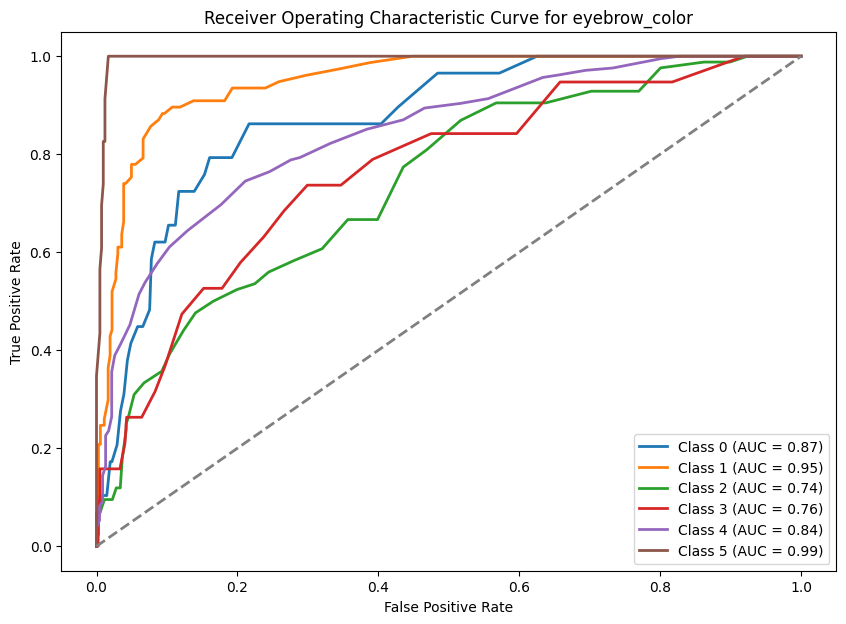

c:\Users\alexi\anaconda3\envs\audio_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Cross-validated accuracy for skin_tone: 0.7491
Saved skin_tone classifier to skin_tone_classifier.pkl
Classification Report for skin_tone:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        99
           1       0.60      0.65      0.62       130
           2       0.43      0.31      0.36        95
           3       0.67      0.79      0.72       116

    accuracy                           0.66       440
   macro avg       0.65      0.65      0.64       440
weighted avg       0.65      0.66      0.65       440



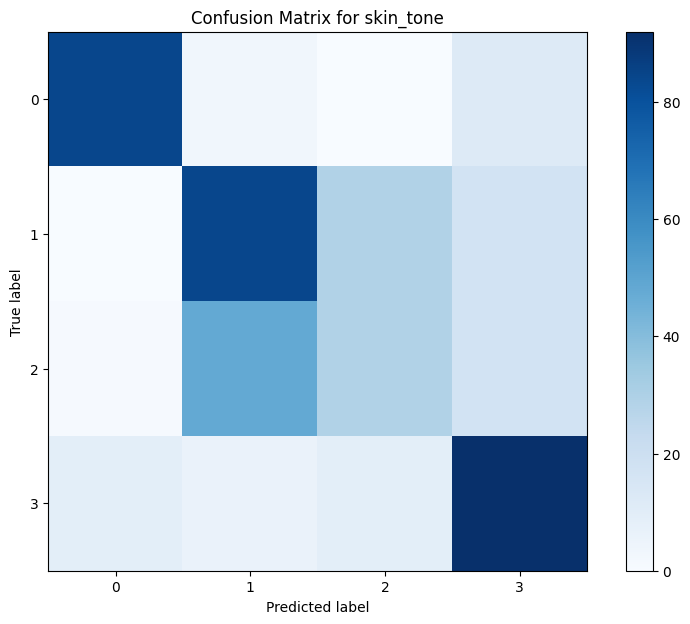

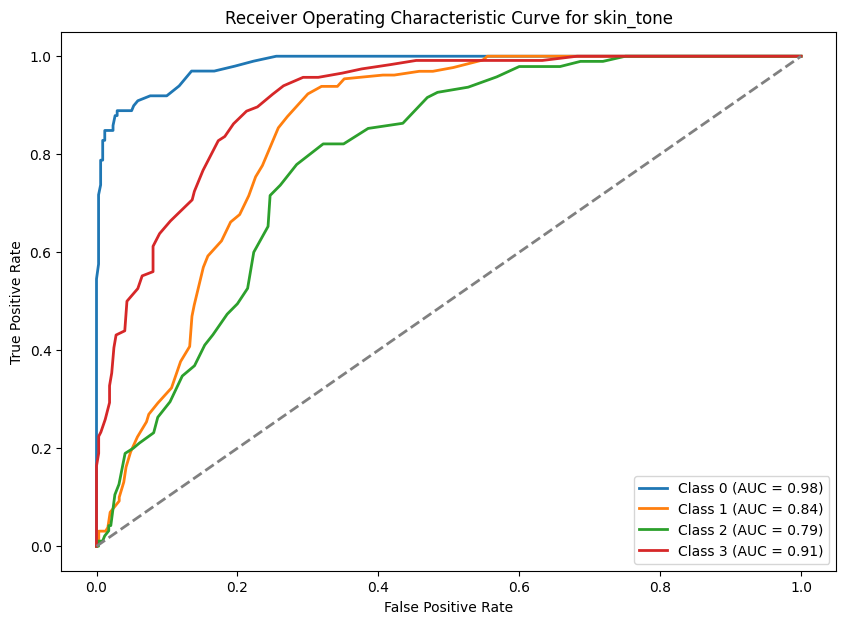

c:\Users\alexi\anaconda3\envs\audio_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found by GridSearchCV for eye_color:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Saved best eye_color classifier to best_eye_color_classifier.pkl
Best Model Classification Report for eye_color:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.24      0.35      0.28       130
           2       0.00      0.00      0.00        95
           3       0.36      0.35      0.36       116
           4       0.00      1.00      0.00         0
           5       0.00      1.00      0.00         0

    accuracy                           0.20       440
   macro avg       0.10      0.45      0.11       440
weighted avg       0.17      0.20      0.18       440

Fitting 3 folds for each of 81 candidates, totalling 243 fits


c:\Users\alexi\anaconda3\envs\audio_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Best parameters found by GridSearchCV for hair_color:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Saved best hair_color classifier to best_hair_color_classifier.pkl
Best Model Classification Report for hair_color:
              precision    recall  f1-score   support

           0       0.68      0.66      0.67        99
           1       0.59      0.39      0.47       130
           2       0.41      0.25      0.31        95
           3       0.50      0.02      0.03       116
           4       0.00      1.00      0.00         0
           5       0.00      1.00      0.00         0
           6       0.00      1.00      0.00         0

    accuracy                           0.32       440
   macro avg       0.31      0.62      0.21       440
weighted avg       0.55      0.32      0.37       440

Fitting 3 folds for each of 81 candidates, totalling 243 fits


c:\Users\alexi\anaconda3\envs\audio_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Best parameters found by GridSearchCV for eyebrow_color:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Saved best eyebrow_color classifier to best_eyebrow_color_classifier.pkl
Best Model Classification Report for eyebrow_color:
              precision    recall  f1-score   support

           0       0.85      0.39      0.54        99
           1       0.59      0.34      0.43       130
           2       0.43      0.29      0.35        95
           3       0.20      0.01      0.02       116
           4       0.00      1.00      0.00         0
           5       0.00      1.00      0.00         0

    accuracy                           0.25       440
   macro avg       0.34      0.51      0.22       440
weighted avg       0.51      0.25      0.33       440

Fitting 3 folds for each of 81 candidates, totalling 243 fits


c:\Users\alexi\anaconda3\envs\audio_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Best parameters found by GridSearchCV for skin_tone:
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Saved best skin_tone classifier to best_skin_tone_classifier.pkl
Best Model Classification Report for skin_tone:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        99
           1       0.65      0.70      0.67       130
           2       0.50      0.34      0.40        95
           3       0.65      0.79      0.72       116

    accuracy                           0.68       440
   macro avg       0.68      0.67      0.67       440
weighted avg       0.67      0.68      0.67       440



In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import numpy as np
import joblib  # For saving models

# Load the NPZ file again to get embeddings and labels
data = np.load('celeba_embeddings_with_all_labels.npz')
embeddings = data['embeddings']
labels = data['labels']

# Flatten the 3D embeddings into 2D
embeddings_flat = embeddings.reshape(embeddings.shape[0], -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings_flat, labels, test_size=0.2, random_state=42)

# Define and train the classifiers for each attribute
classifiers = {
    "eye_color": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "hair_color": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "eyebrow_color": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "skin_tone": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
}

# Training and evaluating the models for each attribute
for attribute, classifier in classifiers.items():
    # Get the labels for the current attribute (this will create a 1D array for each attribute)
    if attribute == "eye_color":
        y_train_attr = [label[0] for label in y_train]
        y_test_attr = [label[0] for label in y_test]
    elif attribute == "hair_color":
        y_train_attr = [label[1] for label in y_train]
        y_test_attr = [label[1] for label in y_test]
    elif attribute == "eyebrow_color":
        y_train_attr = [label[2] for label in y_train]
        y_test_attr = [label[2] for label in y_test]
    else:  # skin_tone
        y_train_attr = [label[3] for label in y_train]
        y_test_attr = [label[3] for label in y_test]
    
    # Apply SMOTE to balance the dataset for the current attribute
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_attr)
    
    # Cross-validation to evaluate model performance
    cv_scores = cross_val_score(classifier, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    print(f"Cross-validated accuracy for {attribute}: {np.mean(cv_scores):.4f}")
    
    # Train the classifier
    classifier.fit(X_train_resampled, y_train_resampled)
    
    # Save the trained classifier for this attribute
    model_filename = f"{attribute}_classifier.pkl"  # File name based on the attribute
    joblib.dump(classifier, model_filename)
    print(f"Saved {attribute} classifier to {model_filename}")
    
    # Make predictions and evaluate the model
    y_pred = classifier.predict(X_test)
    
    # Print the classification report for the current attribute
    print(f"Classification Report for {attribute}:")
    print(classification_report(y_test_attr, y_pred, zero_division=1))  # Handle undefined precision
    print("=" * 50)

    # Confusion Matrix
    cm = confusion_matrix(y_test_attr, y_pred)
    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {attribute}')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test_attr)))
    plt.xticks(tick_marks, np.unique(y_test_attr))
    plt.yticks(tick_marks, np.unique(y_test_attr))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    # ROC Curve (optional for multi-class problems)
    fpr, tpr, _ = roc_curve(y_test_attr, classifier.predict_proba(X_test), pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic Curve for {attribute}')
    plt.legend(loc="lower right")
    plt.show()

# Hyperparameter Tuning with GridSearchCV for all classifiers
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

for attribute in classifiers:
    y_train_attr = [label[0] for label in y_train] if attribute == "eye_color" else \
                   [label[1] for label in y_train] if attribute == "hair_color" else \
                   [label[2] for label in y_train] if attribute == "eyebrow_color" else \
                   [label[3] for label in y_train]

    # Apply SMOTE to balance the dataset for each attribute
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_attr)
    
    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Print the best parameters
    print(f"Best parameters found by GridSearchCV for {attribute}:")
    print(grid_search.best_params_)

    # Use the best model from GridSearchCV
    best_classifier = grid_search.best_estimator_

    # Save the best model after GridSearchCV
    best_model_filename = f"best_{attribute}_classifier.pkl"
    joblib.dump(best_classifier, best_model_filename)
    print(f"Saved best {attribute} classifier to {best_model_filename}")

    # Evaluate the best model on the test set
    y_pred_best = best_classifier.predict(X_test)
    print(f"Best Model Classification Report for {attribute}:")
    print(classification_report(y_test_attr, y_pred_best, zero_division=1))
    print("=" * 50)
